In [1]:
import random
import numpy as np
import math
from scipy import stats
import pandas as pd

N = 200
mean_control = 400
delta_tratamento = 10

std = 100
n_pontos = 40
n_simul = 10

### Variando o STD

<AxesSubplot:>

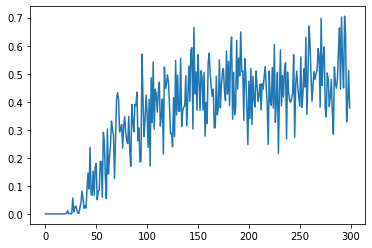

In [3]:

vec_std = [None]*3000

for delta_std_simul in range(0,300):
    mean_tratamento = mean_control + delta_tratamento
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N)*delta_std_simul) + mean_control
        tratamento = (np.random.randn(N)*delta_std_simul) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  
    
    #print("t = " + str(t2))
    #print("p = " + str(pval))
    #adsasd
    vec_std[delta_std_simul] = pval_final

pd.Series(vec_std).plot()

### Variando o efeito médio

<AxesSubplot:>

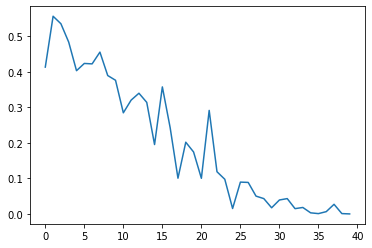

In [4]:

vec_pvalue = [None]*n_pontos

for delta_tratamento_simul in range(0,n_pontos):
    mean_tratamento = mean_control + delta_tratamento_simul
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N)*std) + mean_control
        tratamento = (np.random.randn(N)*std) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  

    vec_pvalue[delta_tratamento_simul] = pval_final

pd.Series(vec_pvalue).plot()

### Variando o tamanho da amostra

<AxesSubplot:>

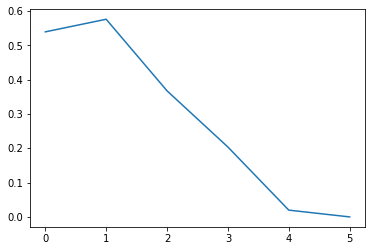

In [5]:
size_simul = [10, 50, 200, 500, 2000, 10000]
vec_pvalue = [None]*len(size_simul)
ii_out=-1
for N_simul in size_simul:
    ii_out+=1
    mean_tratamento = mean_control + delta_tratamento
    
    pval_acum = 0
    for ii in range(0,n_simul):
        controle = (np.random.randn(N_simul)*std) + mean_control
        tratamento = (np.random.randn(N_simul)*std) + mean_tratamento

        ## Cross Checking with the internal scipy function
        t2, pval = stats.ttest_ind(controle,tratamento)
        pval_acum += pval
    pval_final = pval_acum / n_simul  
    
    #print("t = " + str(t2))
    #print("p = " + str(pval))
    vec_pvalue[ii_out] = pval_final

pd.Series(vec_pvalue).plot()

### Power Analysis usando bootstrapping

In [2]:
# Aqui é um histórico dos dados que quer fazer o power analysis (ex. vendas por cliente por dia)
dados_input = (np.random.randn(500000)*std) + mean_control


# Aqui é a matriz de testes para o bootstrapping. Vamos variar o tamanho do tratamento/ controle,
# a diferença entre tratamento e controle e a % entre tratamento e controle, respectivamente
size_simul = [20, 50, 200]
delta_tratamento = [1, 5, 10, 20, 50, 100]
share_trat_contr = [0.1, 0.2, 0.3, 0.4, 0.5]

df = pd.DataFrame()
ii_out=-1
for N_simul in size_simul:
    for delt_trat in delta_tratamento:
        for share in share_trat_contr:
            ii_out+=1

            pval_acum = 0
            for ii in range(0,n_simul):

                n_controle = round(N_simul * (1-share))
                n_tratamento = N_simul - n_controle

                controle = np.random.choice(dados_input, n_controle, replace=True)
                tratamento = np.random.choice(dados_input, n_tratamento, replace=True) + delt_trat

                t2, pval = stats.ttest_ind(controle,tratamento)
                pval_acum += pval
            pval_final = pval_acum / n_simul  


            df = df.append(pd.DataFrame.from_dict({'N': [N_simul], 'delta': [delt_trat], 'share': [share], 'pvalue': [pval_final]}))

df.reset_index(drop=True, inplace = True)
df.tail(20)

,N,delta,share,pvalue
70,200,10,0.1,5.046788e-01
71,200,10,0.2,3.893468e-01
72,200,10,0.3,3.230056e-01
73,200,10,0.4,4.136865e-01
74,200,10,0.5,3.353470e-01
75,200,20,0.1,4.390668e-01
76,200,20,0.2,3.390114e-01
77,200,20,0.3,2.617439e-01
78,200,20,0.4,3.455193e-01
79,200,20,0.5,2.455757e-01
